#### Final Baseline Model
- Cross Validation
- Predictions Based on Test Model 
- Scores on Test Model (at bottom)
- R2, MAE, MAPE
- Interpretation Notes

In [28]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import StandardScaler

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [8]:
# strd_base = pd.read_csv('/Users/jennihawk/Desktop/Thriller Project/Movie_Linear_Regression/thriller_csv_files/train_test_validate_csv/no_trans_base.csv')
# strd_base.head(2)
strd_base = pd.read_csv('/Users/jennihawk/Desktop/Thriller Project/Movie_Linear_Regression/thriller_csv_files/train_test_validate_csv/features_tst.csv')
strd_base.head(2)

,Budget_Adjust,Gross_Adjust,Action_Adv,Adv_Scifi,PG-13,Duration
0,232832101.7,673.15,1,0,1,152
1,151212884.8,493.97,1,1,1,146


### Begin Modeling

#### Cross Validation

In [9]:
features_in = ['Budget_Adjust', 'Action_Adv', 'Adv_Scifi', 'PG-13', 'Duration']

Y = strd_base['Gross_Adjust']
X = strd_base[features_in]

X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                       test_size=.2,     
                                       random_state=42)
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

model = LinearRegression()

kf = KFold(n_splits=5, # number of folds
     shuffle=True, # randomizes order of rows before split
     random_state = 42) # using same number in future code/ rerunning allows us to replicate the split 

#to see all validation scores
lm_cv = cross_val_score(model, X_train, y_train, # estimator, features, target
     cv= kf, # folds created above; could also just use a number 
     scoring='r2') # scoring metric
print(lm_cv)

# to print the mean score with standard deviation, rounded to 2 decimals
print(np.round(np.mean(lm_cv), 2), "+-", np.round(np.std(lm_cv),2))
print("R^2 of model with cross validation is:",np.mean(lm_cv))

[0.21044674 0.26364036 0.06950768 0.17184539 0.26572188]
0.2 +- 0.07
R^2 of model with cross validation is: 0.1962324116112399


#### Standard Scaler

In [10]:
# Setup of variables in Cross Validation code funnel into this
# .fit finds mean and standard deviation of variable in the training set

scaler = StandardScaler().fit(X_train)

# applies scaler to train set
X_train_scaled = scaler.transform(X_train)
#print(X_train_scaled)

# .fit finds mean and standard deviation of variable in test set
scaler = StandardScaler().fit(X_test)

# applies scaler to test set
X_test_scaled = scaler.transform(X_test)
#print(X_test_scaled)

#### Get Predictions

In [11]:
#model = LinearRegression()
model.fit(X_train,y_train)
# # print the intercept
# print(model.intercept_)

LinearRegression()

In [12]:
predictions = model.predict(X_test)
#predictions


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, "['Budget_Adjust', 'Action_Adv', 'Adv_Scifi', 'PG-13', 'Duration']")

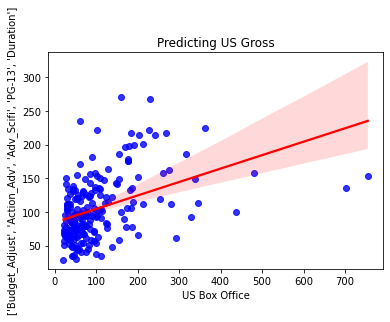

In [13]:
p = sns.regplot(y_test,predictions,scatter_kws={"color": "blue"}, line_kws={"color": "red"}).set(title='Predicting US Gross')

plt.xlabel("US Box Office")
plt.ylabel(f'{features_in}')

In [14]:
#manually test accuracy
predictions = model.predict(X_test)
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

df_comparison = pd.merge(df_results, strd_base, how="inner", left_on="Actual", right_on='Gross_Adjust')
df_comparison.columns

Index(['Actual', 'Predicted', 'Budget_Adjust', 'Gross_Adjust', 'Action_Adv',
       'Adv_Scifi', 'PG-13', 'Duration'],
      dtype='object')

In [15]:
strd_base.columns

Index(['Budget_Adjust', 'Gross_Adjust', 'Action_Adv', 'Adv_Scifi', 'PG-13',
       'Duration'],
      dtype='object')

### See Predictions by Row - Fun! 

In [16]:
#manually shows comparison. Change out features to see how prediction changes. 
pred_df = df_comparison[['Predicted', 
               'Actual',
               'Budget_Adjust',
               'Action_Adv',
               'Adv_Scifi', 'PG-13', 'Duration']]
pd.options.display.float_format = '{:,.2f}'.format

In [17]:
pred_df

,Predicted,Actual,Budget_Adjust,Action_Adv,Adv_Scifi,PG-13,Duration
0,178.95,177.82,"160,021,653.50",1,1,0,128
1,138.14,45.01,"91,568,667.20",1,1,1,126
2,78.65,74.65,"39,926,764.30",1,1,0,100
3,45.33,79.91,"5,598,553.70",0,0,0,97
4,110.23,34.07,"63,593,799.50",1,0,0,119
...,...,...,...,...,...,...,...
222,59.03,33.47,"26,137,492.60",0,0,0,99
223,164.49,128.28,"126,621,495.30",1,0,0,135
224,92.57,100.09,"44,335,803.70",1,0,1,114
225,58.20,88.39,"88,098,633.10",1,1,1,112


### Test Model Scores

#### MAE (Mean Absolute Error) SCORE
- This tells us that the average difference between the actual data value and the value predicted by the model is {mae value}

- The lower the MAE for a given model, the more closely the model is able to predict the actual values.

In [25]:
actual = pred_df['Actual']
pred = pred_df['Predicted']

mae(actual, pred)


53.453800767521294

#### R2 score on test data

In [37]:
print(r2_score(y_test, predictions))

0.17825138566886245


#### MAPE SCORE

In [32]:
# y_true = pred_df['Actual']
# y_pred = pred_df['Predicted']

In [35]:
# #y_true = correct target values.  y_pred = Estimated target values                                
# print(mean_absolute_percentage_error(y_true, y_pred))

#### mae Interpretation 
https://www.statology.org/mean-absolute-error-python/#:~:text=We%20can%20easily%20calculate%20the,()%20function%20from%20Scikit%2Dlearn.<br>

https://towardsdatascience.com/what-are-rmse-and-mae-e405ce230383

https://stackoverflow.com/questions/40323393/what-does-the-mae-actually-telling-me

This tells us that the average difference between the actual data value and the value predicted by the model is {mae value}

The lower the MAE for a given model, the more closely the model is able to predict the actual values.

#### MAPE Interpretation

https://datagy.io/mape-python
The lower the value for MAPE, the better the machine learning model is at predicting values. Inversely, the higher the value for MAPE, the worse the model is at predicting values.

For example, if we calculate a MAPE value of 20% for a given machine learning model, then the average difference between the predicted value and the actual value is 20%.

https://blog.arkieva.com/two-sides-of-the-mape-coin/